In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [84]:
customers = pd.read_csv('Mall_Customers.csv')

In [85]:
customers.columns = ['id', 'gender', 'age', 'income', 'spending_score']

In [86]:
customers.tail()

id  gender  age  income  spending_score
195  196  Female   35     120              79
196  197  Female   45     126              28
197  198    Male   32     126              74
198  199    Male   32     137              18
199  200    Male   30     137              83

In [87]:
customers.dtypes

id                 int64
gender            object
age                int64
income             int64
spending_score     int64
dtype: object

In [88]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
# enc.fit_transform(customers['gender'])
# enc.transform(customers.gender)

In [89]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
customers.gender = le.fit_transform(customers.gender)

In [90]:
customers.head()

id  gender  age  income  spending_score
0   1       1   19      15              39
1   2       1   21      15              81
2   3       0   20      16               6
3   4       0   23      16              77
4   5       0   31      17              40

In [67]:
customers[['age', 'income', 'spending_score']] = preprocessing.normalize(customers[['age', 'income', 'spending_score']])

In [68]:
customers.head()

id  gender       age    income  spending_score
0   1       1  0.413925  0.326783        0.849635
1   2       1  0.247025  0.176446        0.952809
2   3       0  0.760286  0.608229        0.228086
3   4       0  0.280697  0.195267        0.939723
4   5       0  0.580683  0.318439        0.749269

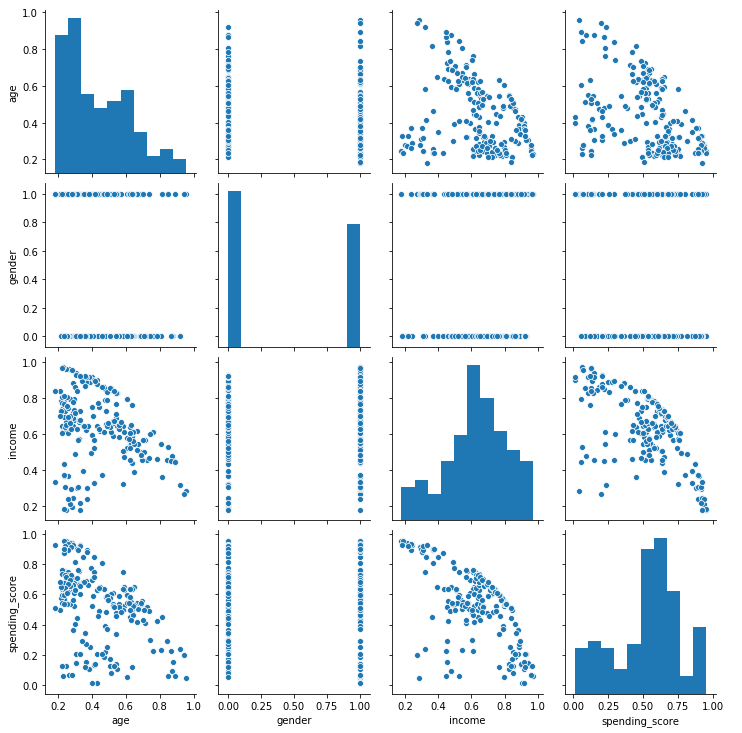

In [26]:
sns.pairplot(customers[['age', 'gender', 'income', 'spending_score']])

In [27]:
# check if basic method works
kmeans = KMeans(n_clusters=16, random_state=0).fit(customers[['age', 'gender', 'income', 'spending_score']])
print(kmeans.labels_)

[ 6  6  7 11  3 11  7 11 13 11 13 11  7 11 13  6  0  6 12 11 12  6  7  6
  7  6  0  6  0 11 13  3 13  6  7  3  7  3  0  3  7  6 12  3  0  3  0  8
  5  5  0  1  8 12  0  4  0 12  8  4 12  1  0  0 12  1  5  0  1  5 12  0
  0  0  4  1  5  4  8  5  4  1 12  5  8  4  0  8  8  5  0 15  4  5  5 15
  5  8  4 15 14  5  4 15  4 14  0  4  4  4  4  8  5 15 14 14  0  5  5  5
 15  5  5  1 14  8  2  1  2  1  2  1 14  8  9  8 10  1  9  8 10  1 14  8
  9  1  2  8 10  1  2  1 10  8 10  8  9  8  9  8 10  8  9  8  2  8  2  8
 10 15  9 15  9  1 10  8  2 15  2  1 10  8  9  8 10  1 10 15 10  8 10 14
  9 14 10 14 10 15  9 15]


In [12]:
def get_indices(data):

    # dunn index not in sklearn, found at https://github.com/jqmviegas/jqm_cvi
    from dunn import dunn, dunn_fast

    indices = pd.DataFrame(columns=['number', 'Calinski-Harabasz', 'Davies-Bouldin', 'Silhouette', 'Dunn', 'Distances'])

    for i in range(2, 10):

        kmeans = KMeans(n_clusters=i, random_state=0).fit(data)

        # ch = metrics.calinski_harabaz_score(data, kmeans.labels_)
        db = metrics.davies_bouldin_score(data, kmeans.labels_)
        si = metrics.silhouette_score(data, kmeans.labels_)
        dn = dunn_fast(data, kmeans.labels_)
        di = kmeans.inertia_

        indices = indices.append({'number': i,
                                  'Calinski-Harabasz': 0,
                                  'Davies-Bouldin': db,
                                  'Silhouette': si,
                                  'Dunn': dn, 
                                  'Distances': di}, 
                                 ignore_index=True)
        
    return indices

In [13]:
indices = get_indices(customers[['age', 'income', 'spending_score']])

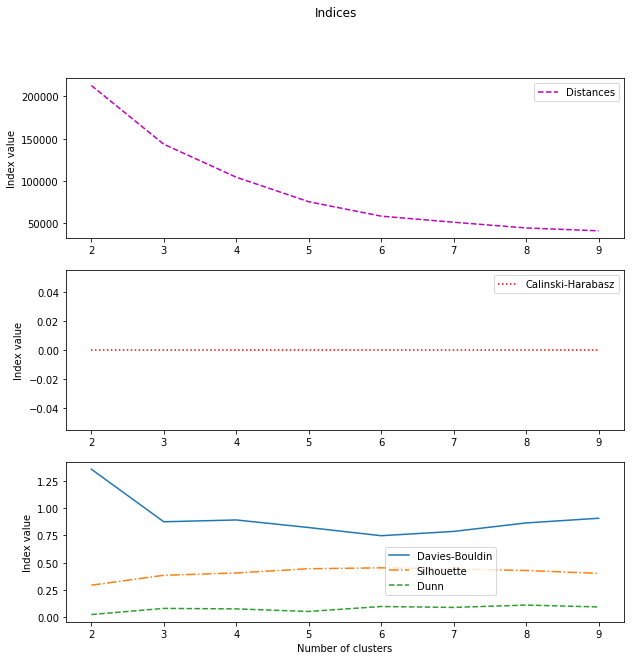

CPU times: user 756 ms, sys: 270 ms, total: 1.03 s
Wall time: 799 ms


In [69]:
%%time
x = np.array(indices['number'])
Y = np.array(indices[['Calinski-Harabasz', 'Davies-Bouldin', 'Silhouette', 'Dunn', 'Distances']])

fig = plt.figure(figsize=(10, 10))
fig.suptitle('Indices')

ax = fig.add_subplot(3,1,1)
ax.plot(x, Y[:, 4], label='Distances', color='m', linestyle='dashed', linewidth=1.5)
ax.legend()
ax.set_ylabel('Index value')

ax = fig.add_subplot(3,1,2)
ax.plot(x, Y[:, 0], label='Calinski-Harabasz', color='r', linestyle='dotted', linewidth=1.5)
ax.legend()
ax.set_ylabel('Index value')

ax = fig.add_subplot(3,1,3)
ax.plot(x, Y[:, 1], label='Davies-Bouldin', linestyle='solid', linewidth=1.5)
ax.plot(x, Y[:, 2], label='Silhouette', linestyle='dashdot', linewidth=1.5)
ax.plot(x, Y[:, 3], label='Dunn', linestyle='dashed', linewidth=1.5)
ax.legend(bbox_to_anchor=(0.78,0.5))
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Index value')

plt.show()

In [58]:
# customers['gender'] = customers['gender']*10

customers_normalized = (customers-customers.min())/(customers.max()-customers.min())
# customers = preprocessing.normalize(customers)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [52]:
customers

array([[0.02128141, 0.21281413, 0.40434685, 0.3192212 , 0.82997512],
       [0.02335868, 0.11679342, 0.24526619, 0.17519014, 0.94602673],
       [0.11330844, 0.        , 0.75538957, 0.60431166, 0.22661687],
       [0.04875874, 0.        , 0.28036275, 0.19503495, 0.93860571],
       [0.09325048, 0.        , 0.57815298, 0.31705163, 0.74600385],
       [0.07393896, 0.        , 0.27110953, 0.20949373, 0.93656021],
       [0.17316974, 0.        , 0.86584872, 0.44529363, 0.14843121],
       [0.08100669, 0.        , 0.23289423, 0.18226505, 0.95182858],
       [0.132025  , 0.14669444, 0.93884444, 0.27871944, 0.04400833],
       [0.1236076 , 0.        , 0.3708228 , 0.23485444, 0.88997472],
       [0.15156922, 0.1377902 , 0.92319436, 0.26180139, 0.19290628],
       [0.11175006, 0.        , 0.32593767, 0.17693759, 0.92193798],
       [0.20160491, 0.        , 0.89946807, 0.3101614 , 0.23262105],
       [0.16613773, 0.        , 0.28480754, 0.23733962, 0.91375753],
       [0.31531816, 0.21021211, 0.

In [72]:
# 'final' configuration
kmeans = KMeans(n_clusters=3, random_state=0).fit(customers[['gender', 'age', 'income', 'spending_score']])

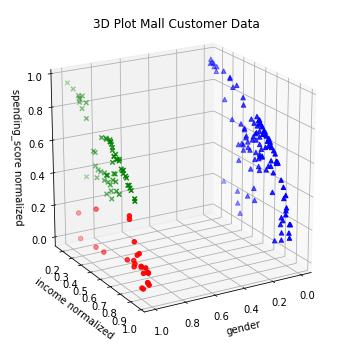

In [82]:
# what does it look like?
# first combine data and labels

clusters = [
  ('r', 'o', 0), 
  ('b', '^', 1), 
  ('g', 'x', 2), 
  ('m', '.', 3), 
  ('y', '*', 4), 
  ('c', '+', 5),
  ('maroon', '>', 6),
  ('lime', 'D', 7),
  ('gold', 'H', 8),
  ('indigo', '1', 9),
  ('aquamarine', 'v', 10),
]

def plot_data_3d(n):
    '''n :  number of clusters'''
    labeled_data = np.c_[customers[['gender', 'age', 'income', 'spending_score']], kmeans.labels_]

    fig = plt.figure(figsize=(5, 5))

    # show first angle
    ax = fig.add_subplot(111, projection='3d', azim=60, elev=20)

    for c, m, l in clusters[0:n]:
        xs = labeled_data[labeled_data[:,-1] == l][:, 0]
        ys = labeled_data[labeled_data[:,-1] == l][:, 2]
        zs = labeled_data[labeled_data[:,-1] == l][:, 3]
        ax.scatter(xs, ys, zs, c=c, marker=m)

    ax.set_xlabel(customers[['gender', 'income', 'spending_score']].columns[0])
    ax.set_ylabel(customers[['gender', 'income', 'spending_score']].columns[1] + ' normalized')
    ax.set_zlabel(customers[['gender', 'income', 'spending_score']].columns[2] + ' normalized')
    ax.set_title('3D Plot Mall Customer Data')

    fig.tight_layout()
    plt.savefig('kmeans_customers_3d.pdf')
    plt.show()
    
plot_data_3d(3)

Using gender in clustering did not prove to be beneficial to clustering. All it did was split the clusters from clustering without gender basically in half each, adding no valuable information. This of course is probably due to the limitation of the algorithm, because it is not good at handling categorical data (there is no meaningful interpretation of distance in categorical data).

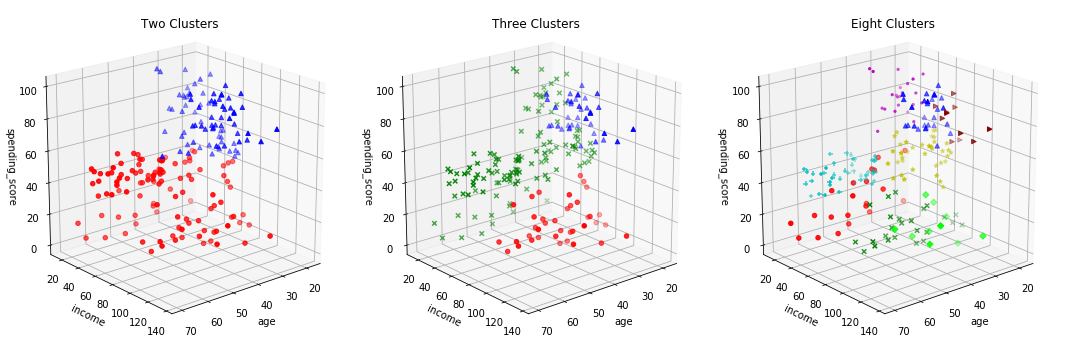

In [92]:
# what does it look like?
# first combine data and labels

def plot_data_3d():
    '''n :  number of clusters'''
    

    fig = plt.figure(figsize=(15, 5))

    # show first angle
    ax = fig.add_subplot(131, projection='3d', azim=50, elev=20)
    
    kmeans = KMeans(n_clusters=2, random_state=0).fit(customers[['age', 'income', 'spending_score']])
    labeled_data = np.c_[customers[['age', 'income', 'spending_score']], kmeans.labels_]

    for c, m, l in [('r', 'o', 0), ('b', '^', 1), ('g', 'x', 2), ('m', '.', 3), ('y', '*', 4), ('cyan', '+', 5)][0:2]:
        xs = labeled_data[labeled_data[:,-1] == l][:, 0]
        ys = labeled_data[labeled_data[:,-1] == l][:, 1]
        zs = labeled_data[labeled_data[:,-1] == l][:, 2]
        ax.scatter(xs, ys, zs, c=c, marker=m)

    ax.set_xlabel(customers[['age', 'income', 'spending_score']].columns[0])
    ax.set_ylabel(customers[['age', 'income', 'spending_score']].columns[1])
    ax.set_zlabel(customers[['age', 'income', 'spending_score']].columns[2])
    ax.set_title('Two Clusters')

    # show second angle
    ax = fig.add_subplot(132, projection='3d', azim=50, elev=20)
    
    kmeans = KMeans(n_clusters=3, random_state=0).fit(customers[['age', 'income', 'spending_score']])
    labeled_data = np.c_[customers[['age', 'income', 'spending_score']], kmeans.labels_]

    for c, m, l in [('r', 'o', 0), ('b', '^', 1), ('g', 'x', 2), ('m', '.', 3), ('y', '*', 4), ('cyan', '+', 5)][0:3]:
        xs = labeled_data[labeled_data[:,-1] == l][:, 0]
        ys = labeled_data[labeled_data[:,-1] == l][:, 1]
        zs = labeled_data[labeled_data[:,-1] == l][:, 2]
        ax.scatter(xs, ys, zs, c=c, marker=m)

    ax.set_xlabel(customers[['age', 'income', 'spending_score']].columns[0])
    ax.set_ylabel(customers[['age', 'income', 'spending_score']].columns[1])
    ax.set_zlabel(customers[['age', 'income', 'spending_score']].columns[2])
    ax.set_title('Three Clusters')
    
    # show third angle
    ax = fig.add_subplot(133, projection='3d', azim=50, elev=20)
    
    kmeans = KMeans(n_clusters=8, random_state=0).fit(customers[['age', 'income', 'spending_score']])
    labeled_data = np.c_[customers[['age', 'income', 'spending_score']], kmeans.labels_]

    for c, m, l in [  ('r', 'o', 0), ('b', '^', 1), ('g', 'x', 2), ('m', '.', 3), ('y', '*', 4), ('c', '+', 5),('maroon', '>', 6),('lime', 'D', 7),('gold', 'H', 8),('indigo', '1', 9),('aquamarine', 'v', 10),][0:8]:
        xs = labeled_data[labeled_data[:,-1] == l][:, 0]
        ys = labeled_data[labeled_data[:,-1] == l][:, 1]
        zs = labeled_data[labeled_data[:,-1] == l][:, 2]
        ax.scatter(xs, ys, zs, c=c, marker=m)

    ax.set_xlabel(customers[['age', 'income', 'spending_score']].columns[0])
    ax.set_ylabel(customers[['age', 'income', 'spending_score']].columns[1])
    ax.set_zlabel(customers[['age', 'income', 'spending_score']].columns[2])
    ax.set_title('Eight Clusters')
    
    fig.tight_layout()
    # fig.suptitle('sdkjfh')
    # plt.show()
    plt.savefig('kmeans_mall_3d_multi.pdf')
    
    
plot_data_3d()

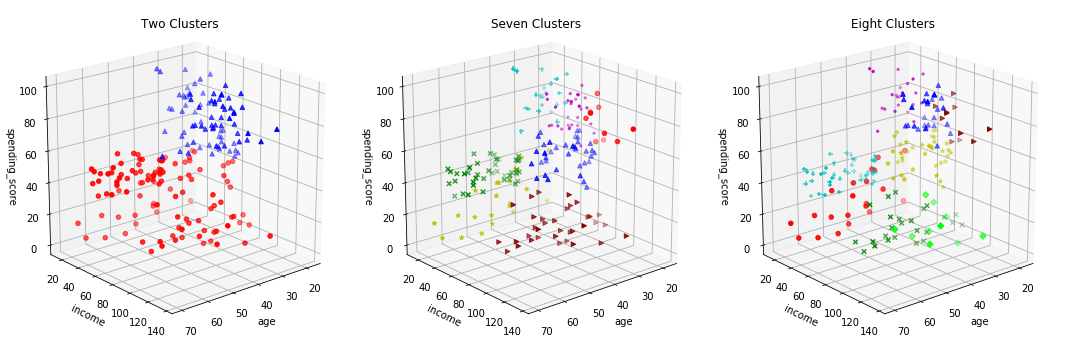

In [100]:
# what does it look like?
# first combine data and labels

def plot_data_3d():
    '''n :  number of clusters'''
    

    fig = plt.figure(figsize=(15, 5))

    # show first angle
    ax = fig.add_subplot(131, projection='3d', azim=50, elev=20)
    
    kmeans = KMeans(n_clusters=2, random_state=0).fit(customers[['age', 'income', 'spending_score']])
    labeled_data = np.c_[customers[['age', 'income', 'spending_score']], kmeans.labels_]

    for c, m, l in [('r', 'o', 0), ('b', '^', 1), ('g', 'x', 2), ('m', '.', 3), ('y', '*', 4), ('cyan', '+', 5)][0:2]:
        xs = labeled_data[labeled_data[:,-1] == l][:, 0]
        ys = labeled_data[labeled_data[:,-1] == l][:, 1]
        zs = labeled_data[labeled_data[:,-1] == l][:, 2]
        ax.scatter(xs, ys, zs, c=c, marker=m)

    ax.set_xlabel(customers[['age', 'income', 'spending_score']].columns[0])
    ax.set_ylabel(customers[['age', 'income', 'spending_score']].columns[1])
    ax.set_zlabel(customers[['age', 'income', 'spending_score']].columns[2])
    ax.set_title('Two Clusters')

    # show second angle
    ax = fig.add_subplot(132, projection='3d', azim=50, elev=20)
    
    kmeans = KMeans(n_clusters=7, random_state=0).fit(customers[['age', 'income', 'spending_score']])
    labeled_data = np.c_[customers[['age', 'income', 'spending_score']], kmeans.labels_]

    for c, m, l in [  ('r', 'o', 0), ('b', '^', 1), ('g', 'x', 2), ('m', '.', 3), ('y', '*', 4), ('c', '+', 5),('maroon', '>', 6),('lime', 'D', 7),('gold', 'H', 8),('indigo', '1', 9),('aquamarine', 'v', 10),][0:8]:
        xs = labeled_data[labeled_data[:,-1] == l][:, 0]
        ys = labeled_data[labeled_data[:,-1] == l][:, 1]
        zs = labeled_data[labeled_data[:,-1] == l][:, 2]
        ax.scatter(xs, ys, zs, c=c, marker=m)

    ax.set_xlabel(customers[['age', 'income', 'spending_score']].columns[0])
    ax.set_ylabel(customers[['age', 'income', 'spending_score']].columns[1])
    ax.set_zlabel(customers[['age', 'income', 'spending_score']].columns[2])
    ax.set_title('Seven Clusters')
    
    # show third angle
    ax = fig.add_subplot(133, projection='3d', azim=50, elev=20)
    
    kmeans = KMeans(n_clusters=8, random_state=0).fit(customers[['age', 'income', 'spending_score']])
    labeled_data = np.c_[customers[['age', 'income', 'spending_score']], kmeans.labels_]

    for c, m, l in [  ('r', 'o', 0), ('b', '^', 1), ('g', 'x', 2), ('m', '.', 3), ('y', '*', 4), ('c', '+', 5),('maroon', '>', 6),('lime', 'D', 7),('gold', 'H', 8),('indigo', '1', 9),('aquamarine', 'v', 10),][0:9]:
        xs = labeled_data[labeled_data[:,-1] == l][:, 0]
        ys = labeled_data[labeled_data[:,-1] == l][:, 1]
        zs = labeled_data[labeled_data[:,-1] == l][:, 2]
        ax.scatter(xs, ys, zs, c=c, marker=m)

    ax.set_xlabel(customers[['age', 'income', 'spending_score']].columns[0])
    ax.set_ylabel(customers[['age', 'income', 'spending_score']].columns[1])
    ax.set_zlabel(customers[['age', 'income', 'spending_score']].columns[2])
    ax.set_title('Eight Clusters')
    
    fig.tight_layout()
    # fig.suptitle('sdkjfh')
    # plt.show()
    plt.savefig('kmeans_mall_3d_multi.pdf')
    
    
plot_data_3d()